In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, softmax, relu

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [2]:
def figure(History, legend):
  ####################### PLOT TRAINING VS VALIDATION ######################
  ########## Accuracy ###########
  acc = History.history['acc']
  val_acc = History.history['val_acc']
  loss = History.history['loss']
  val_loss = History.history['val_loss']

  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.grid()
  plt.show()

  ########## Loss ###########
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  try:
    loss_no_reg = History.history['categorical_crossentropy']
    val_loss_no_reg = History.history['val_categorical_crossentropy']
    plt.plot(loss_no_reg)
    plt.plot(val_loss_no_reg)
    plt.legend(legend + [legend[0]+' sin reg', legend[1]+' sin reg'], loc='upper left')
  except:
    plt.legend(legend, loc='upper left')

  plt.grid()
  plt.show()

In [3]:
# load dataset
(TRAIN_x_orig, TRAIN_y), (test_x_orig, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Dimensiones de los conjuntos de ENTRENAMIENTO y prueba
print ("TRAIN_x_orig shape: " + str(TRAIN_x_orig.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

TRAIN_x_orig shape: (60000, 28, 28)
TRAIN_y shape: (60000,)
test_x_orig shape: (10000, 28, 28)
test_y shape: (10000,)


Text(0.5, 1.0, '1')

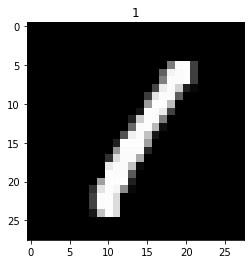

In [5]:
# Ejemplo de una imagen
index = 3
plt.imshow(TRAIN_x_orig[index], cmap='gray')
plt.title(TRAIN_y[index])

In [6]:
# Aplanamiento de la imagen
TRAIN_x_flatten = TRAIN_x_orig.reshape(TRAIN_x_orig.shape[0], -1)
test_x_flatten =  test_x_orig.reshape(test_x_orig.shape[0], -1)

print ("TRAIN_x_flatten shape: " + str(TRAIN_x_flatten.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("test_x_flatten shape: " + str(test_x_flatten.shape))
print ("test_y shape: " + str(test_y.shape))


TRAIN_x_flatten shape: (60000, 784)
TRAIN_y shape: (60000,)
test_x_flatten shape: (10000, 784)
test_y shape: (10000,)


In [7]:
for i in range(10):
  print(i,' :', np.sum(TRAIN_y==i))

0  : 5923
1  : 6742
2  : 5958
3  : 6131
4  : 5842
5  : 5421
6  : 5918
7  : 6265
8  : 5851
9  : 5949


In [8]:
# Escalamiento de los datos
TRAIN_x = TRAIN_x_flatten/255.
test_x = test_x_flatten/255.


In [9]:
# Segmentación en entrenamiento y validación
train_x, valid_x, train_y, valid_y = train_test_split(TRAIN_x, TRAIN_y, test_size=1/6, random_state=42)


In [10]:
# Resumen de dimensiones
print ("TRAIN_x shape: " + str(TRAIN_x.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("valid_x shape: " + str(valid_x.shape))
print ("valid_y shape: " + str(valid_y.shape))
print ("test_x shape:  " + str(test_x.shape))
print ("test_y shape:  " + str(test_y.shape))

TRAIN_x shape: (60000, 784)
TRAIN_y shape: (60000,)
train_x shape: (50000, 784)
train_y shape: (50000,)
valid_x shape: (10000, 784)
valid_y shape: (10000,)
test_x shape:  (10000, 784)
test_y shape:  (10000,)


In [44]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
#Converts a class vector
TRAIN_y_cat = to_categorical(TRAIN_y)
train_y_cat = to_categorical(train_y)
valid_y_cat = to_categorical(valid_y)
test_y_cat = to_categorical(test_y)

print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
print ("train_y_cat shape: " + str(train_y_cat.shape))
print ("valid_y_cat shape: " + str(valid_y_cat.shape))
print ("test_y_cat shape:  " + str(test_y_cat.shape))

TRAIN_y_cat shape: (60000, 10)
train_y_cat shape: (50000, 10)
valid_y_cat shape: (10000, 10)
test_y_cat shape:  (10000, 10)


# Modelo simple

In [12]:
# Creación del modelo
model = Sequential([
                    Dense(units=10, input_shape= [train_x.shape[-1]], activation=softmax)
                    ])

In [13]:
# Arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, validation_data= (valid_x, valid_y_cat))


Epoch 1/30
1563/1563 [==============================] - 7s 3ms/step - loss: 0.6036 - acc: 0.8372 - val_loss: 0.3016 - val_acc: 0.9146
Epoch 2/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3073 - acc: 0.9130 - val_loss: 0.2842 - val_acc: 0.9192
Epoch 3/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2773 - acc: 0.9205 - val_loss: 0.2762 - val_acc: 0.9221
Epoch 4/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2664 - acc: 0.9253 - val_loss: 0.2727 - val_acc: 0.9229
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2647 - acc: 0.9271 - val_loss: 0.2737 - val_acc: 0.9244
Epoch 6/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2538 - acc: 0.9294 - val_loss: 0.2706 - val_acc: 0.9233
Epoch 7/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2621 - acc: 0.9282 - val_loss: 0.2675 - val_acc: 0.9267
Epoch 8/30
1563/1563 [==============================] - 4s 2ms

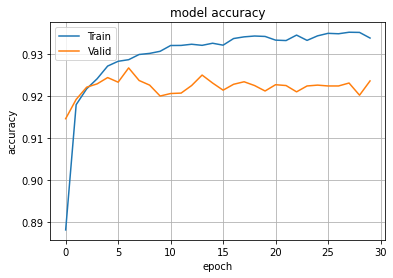

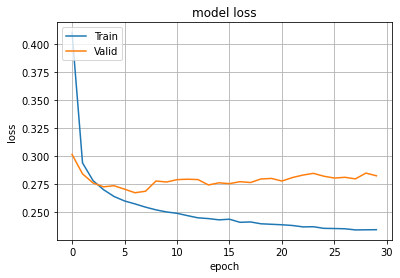

In [15]:
# Plot de curvas
figure(History,['Train', 'Valid'])

In [16]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[1]) )

train Loss: 0.2225, train Acc: 0.9378
valid Loss: 0.2825, valid Acc: 0.9236


# Modelo complejo

In [17]:
# Creación del modelo
model = Sequential([
                    Dense(units=200, input_shape= [train_x.shape[-1]], activation=relu),
                    Dense(units=50, activation=relu),
                    Dense(units=10, activation=softmax)
                    ])

# Arquitectura del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, validation_data= (valid_x, valid_y_cat))


Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5807 - acc: 0.8357 - val_loss: 0.1714 - val_acc: 0.9517
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1415 - acc: 0.9589 - val_loss: 0.1176 - val_acc: 0.9665
Epoch 3/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0974 - acc: 0.9719 - val_loss: 0.0972 - val_acc: 0.9700
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0680 - acc: 0.9802 - val_loss: 0.0850 - val_acc: 0.9749
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0499 - acc: 0.9854 - val_loss: 0.0841 - val_acc: 0.9734
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0381 - acc: 0.9887 - val_loss: 0.0791 - val_acc: 0.9766
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0297 - acc: 0.9916 - val_loss: 0.0732 - val_acc: 0.9779
Epoch 8/30
1563/1563 [==============================] - 4s 3ms

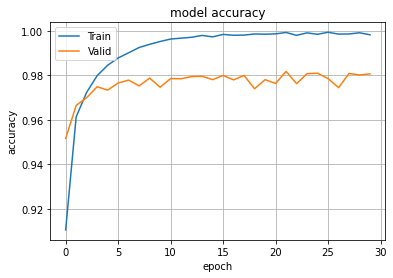

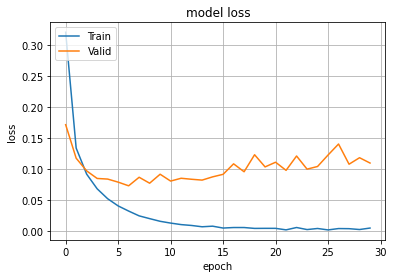

In [19]:
# Plot de curvas
figure(History,['Train', 'Valid'])

In [20]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[1]) )

train Loss: 0.0031, train Acc: 0.9990
valid Loss: 0.1098, valid Acc: 0.9807


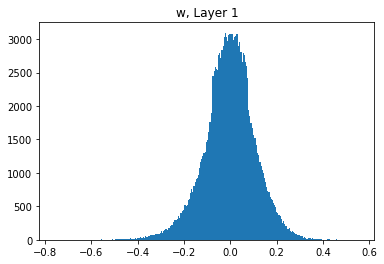

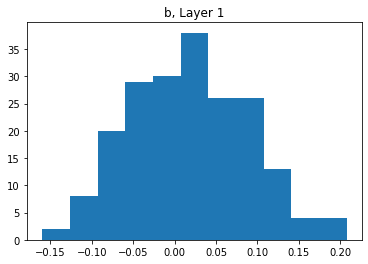

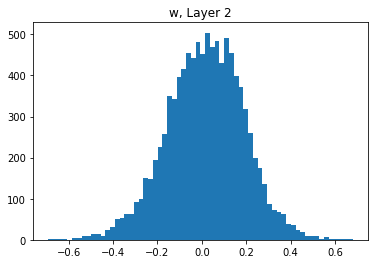

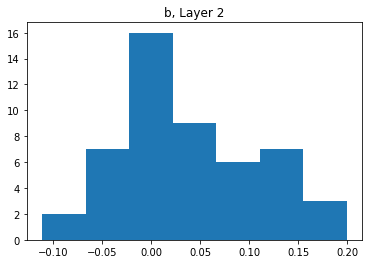

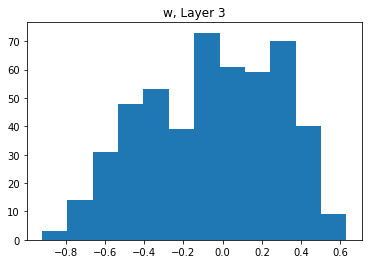

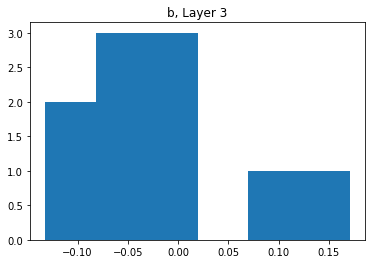

In [21]:
for i in range(len(model.get_weights())):
  _ = plt.hist(model.get_weights()[i].reshape((-1,)), bins='auto')
  if i%2==0:
    plt.title('w, ' + 'Layer ' + str(i//2+1))
  else:
    plt.title('b, ' + 'Layer ' + str(i//2+1))

  plt.show()

# Dropout

In [22]:
# Creación del modelo
model = Sequential([
                    Dense(units=200, input_shape= [train_x.shape[-1]], activation=relu),
                    Dropout(0.35),
                    Dense(units=50, activation=relu),
                    Dropout(0.35),
                    Dense(units=10, activation=softmax)
                    ])

# Arquitectura del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                10050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, validation_data= (valid_x, valid_y_cat))


Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8505 - acc: 0.7349 - val_loss: 0.1885 - val_acc: 0.9421
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2708 - acc: 0.9234 - val_loss: 0.1419 - val_acc: 0.9568
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1984 - acc: 0.9435 - val_loss: 0.1138 - val_acc: 0.9655
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1600 - acc: 0.9554 - val_loss: 0.0976 - val_acc: 0.9705
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1405 - acc: 0.9587 - val_loss: 0.0913 - val_acc: 0.9732
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1237 - acc: 0.9654 - val_loss: 0.0881 - val_acc: 0.9745
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1147 - acc: 0.9672 - val_loss: 0.0840 - val_acc: 0.9741
Epoch 8/30
1563/1563 [==============================] - 4s 3ms

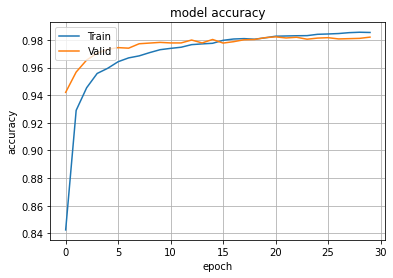

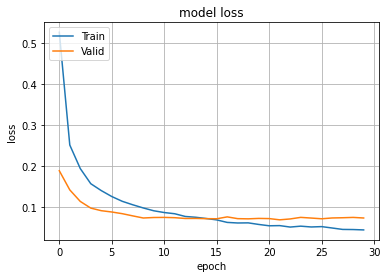

In [24]:
# Plot de curvas
figure(History,['Train', 'Valid'])

In [25]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[1]) )

train Loss: 0.0069, train Acc: 0.9981
valid Loss: 0.0735, valid Acc: 0.9821


# Early stopping

In [26]:
# Creación del modelo
model = Sequential([
                    Dense(units=200, input_shape= [train_x.shape[-1]], activation=relu),
                    Dense(units=50, activation=relu),
                    Dense(units=10, activation=softmax)
                    ])

# Arquitectura del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Early stopping
stopping = EarlyStopping(monitor='val_loss',min_delta=0,mode='auto',patience=2, restore_best_weights=True)
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, callbacks=[stopping], validation_data= (valid_x, valid_y_cat))


Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5366 - acc: 0.8502 - val_loss: 0.1545 - val_acc: 0.9541
Epoch 2/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1325 - acc: 0.9616 - val_loss: 0.1117 - val_acc: 0.9657
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0879 - acc: 0.9745 - val_loss: 0.0951 - val_acc: 0.9708
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0646 - acc: 0.9816 - val_loss: 0.0928 - val_acc: 0.9720
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0441 - acc: 0.9870 - val_loss: 0.0790 - val_acc: 0.9763
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0358 - acc: 0.9898 - val_loss: 0.0848 - val_acc: 0.9753
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0288 - acc: 0.9911 - val_loss: 0.0742 - val_acc: 0.9798
Epoch 8/30
1563/1563 [==============================] - 4s 3ms

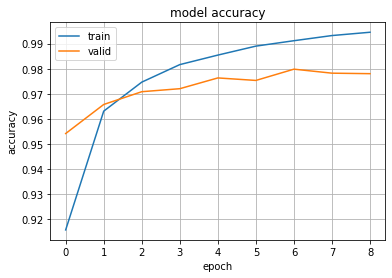

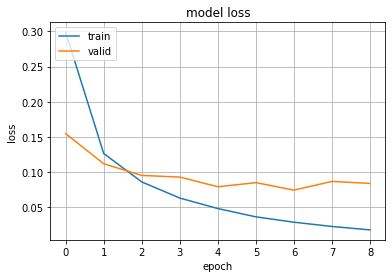

In [28]:
figure(History,['train', 'valid'])

In [29]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[1]) )

train Loss: 0.0183, train Acc: 0.9951
valid Loss: 0.0742, valid Acc: 0.9798


# weight regularizers

In [30]:
# Creación del modelo
model = Sequential([
                    Dense(units=200, input_shape= [train_x.shape[-1]], activation=relu, kernel_regularizer= l2(0.0001)  ),
                    Dense(units=50, activation=relu, kernel_regularizer= l2(0.0001)),
                    Dense(units=10, activation=softmax, kernel_regularizer= l2(0.0001)),
                    ])

# Arquitectura del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['acc', tf.keras.losses.CategoricalCrossentropy()])
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, validation_data= (valid_x, valid_y_cat))


Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5713 - acc: 0.8507 - categorical_crossentropy: 0.5358 - val_loss: 0.1912 - val_acc: 0.9541 - val_categorical_crossentropy: 0.1545
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1730 - acc: 0.9602 - categorical_crossentropy: 0.1359 - val_loss: 0.1549 - val_acc: 0.9639 - val_categorical_crossentropy: 0.1165
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1334 - acc: 0.9725 - categorical_crossentropy: 0.0947 - val_loss: 0.1402 - val_acc: 0.9711 - val_categorical_crossentropy: 0.1003
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1089 - acc: 0.9794 - categorical_crossentropy: 0.0689 - val_loss: 0.1275 - val_acc: 0.9745 - val_categorical_crossentropy: 0.0866
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0941 - acc: 0.9855 - categorical_crossentropy: 0.0531 - val_loss: 0.1274 - val_acc: 0.9742

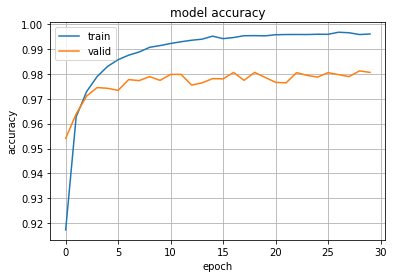

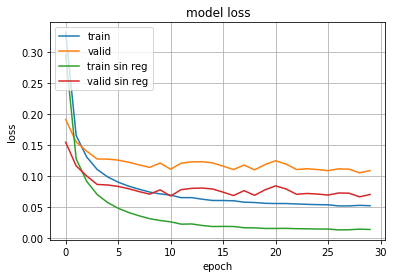

In [32]:
figure(History,['train', 'valid'])

In [33]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[2], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[2], Metricas[1]) )

train Loss: 0.0112, train Acc: 0.9976
valid Loss: 0.0704, valid Acc: 0.9806


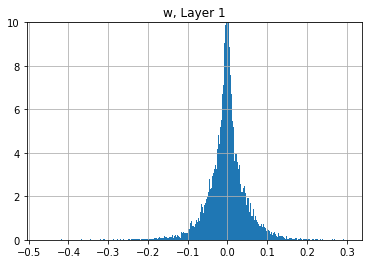

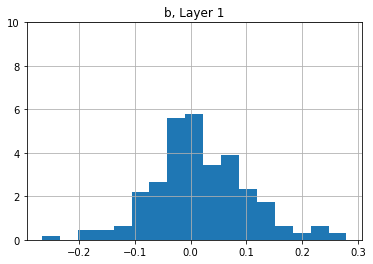

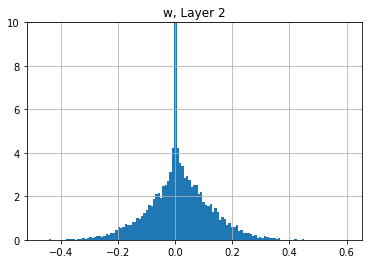

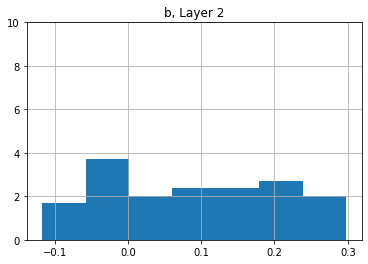

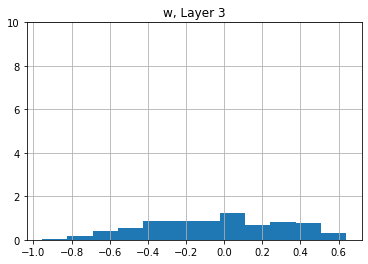

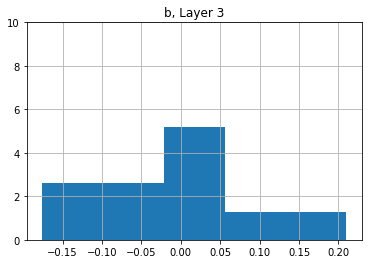

In [34]:
for i in range(len(model.get_weights())):
  _ = plt.hist(model.get_weights()[i].reshape((-1,)), bins='auto', density = True)
  plt.ylim((0,10))
  if i%2==0:
    plt.title('w, ' + 'Layer ' + str(i//2+1))
  else:
    plt.title('b, ' + 'Layer ' + str(i//2+1))
  plt.grid()
  plt.show()


# Uniendo todos los métodos

In [35]:
# Creación del modelo
model = Sequential([
                    Dense(units=200, input_shape= [train_x.shape[-1]], activation=relu, kernel_regularizer= l2(0.0001)  ),
                    Dropout(0.35),
                    Dense(units=50, activation=relu, kernel_regularizer= l2(0.0001)  ),
                    Dropout(0.35),
                    Dense(units=10, activation=softmax, kernel_regularizer= l2(0.0001)  ),
                    ])

# Arquitectura del modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['acc', tf.keras.losses.CategoricalCrossentropy()])
# Early stopping
stopping = EarlyStopping(monitor='val_categorical_crossentropy',min_delta=0,mode='auto',patience=10, restore_best_weights=True)
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=50, batch_size=32, callbacks=[stopping], validation_data= (valid_x, valid_y_cat))


Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9082 - acc: 0.7257 - categorical_crossentropy: 0.8737 - val_loss: 0.2227 - val_acc: 0.9445 - val_categorical_crossentropy: 0.1851
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3039 - acc: 0.9215 - categorical_crossentropy: 0.2651 - val_loss: 0.1747 - val_acc: 0.9606 - val_categorical_crossentropy: 0.1332
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2499 - acc: 0.9411 - categorical_crossentropy: 0.2075 - val_loss: 0.1592 - val_acc: 0.9652 - val_categorical_crossentropy: 0.1147
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2093 - acc: 0.9522 - categorical_crossentropy: 0.1642 - val_loss: 0.1490 - val_acc: 0.9690 - val_categorical_crossentropy: 0.1022
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1899 - acc: 0.9586 - categorical_crossentropy: 0.1427 - val_loss: 0.1420 - val_acc: 0.9719

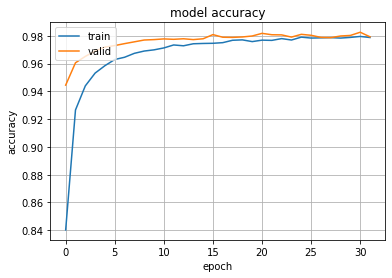

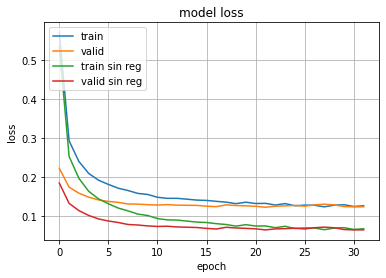

In [37]:
figure(History,['train', 'valid'])

In [38]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[2], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[2], Metricas[1]) )

train Loss: 0.0214, train Acc: 0.9938
valid Loss: 0.0653, valid Acc: 0.9808


# Test

In [39]:
# Creación del modelo
modelo_final = Sequential([
                    Dense(units=200, input_shape= [TRAIN_x.shape[-1]], activation=relu, kernel_regularizer= l2(0.0001)  ),
                    Dropout(0.35),
                    Dense(units=50, activation=relu, kernel_regularizer= l2(0.0001)   ),
                    Dropout(0.35),
                    Dense(units=10, activation=softmax, kernel_regularizer= l2(0.0001)    ),
                    ])

# Arquitectura del modelo
modelo_final.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Definición del optimizador, función de pérdidas y métricas
modelo_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['acc', tf.keras.losses.CategoricalCrossentropy()])
# Early stopping
stopping = EarlyStopping(monitor='val_categorical_crossentropy',min_delta=0,mode='auto',patience=10, restore_best_weights=True)
# Ajuste de pesos
History = modelo_final.fit(TRAIN_x, TRAIN_y_cat, epochs=50, batch_size=32, callbacks=[stopping], validation_data= (test_x, test_y_cat))


Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8347 - acc: 0.7479 - categorical_crossentropy: 0.8000 - val_loss: 0.2055 - val_acc: 0.9481 - val_categorical_crossentropy: 0.1662
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2787 - acc: 0.9310 - categorical_crossentropy: 0.2383 - val_loss: 0.1631 - val_acc: 0.9645 - val_categorical_crossentropy: 0.1198
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2278 - acc: 0.9466 - categorical_crossentropy: 0.1835 - val_loss: 0.1443 - val_acc: 0.9724 - val_categorical_crossentropy: 0.0977
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2054 - acc: 0.9551 - categorical_crossentropy: 0.1583 - val_loss: 0.1379 - val_acc: 0.9731 - val_categorical_crossentropy: 0.0889
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1864 - acc: 0.9592 - categorical_crossentropy: 0.1371 - val_loss: 0.1301 - val_acc: 0.9755

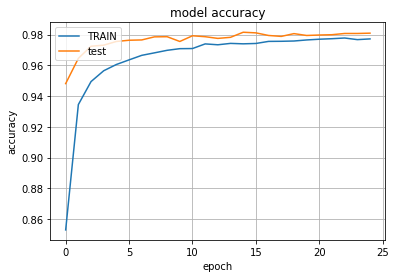

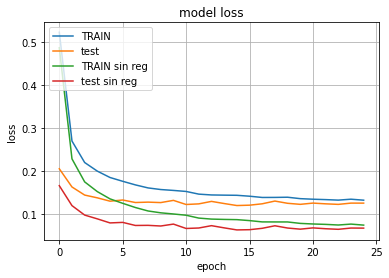

In [41]:
figure(History,['TRAIN', 'test'])

In [42]:
# Metricas
Metricas = modelo_final.evaluate(TRAIN_x, TRAIN_y_cat , verbose=0)
print('TRAIN Loss: %.4f, TRAIN Acc: %.4f' % (Metricas[2], Metricas[1]) )
Metricas = modelo_final.evaluate(test_x, test_y_cat , verbose=0)
print('test Loss: %.4f, test Acc: %.4f' % (Metricas[2], Metricas[1]) )

TRAIN Loss: 0.0286, TRAIN Acc: 0.9913
test Loss: 0.0632, test Acc: 0.9815


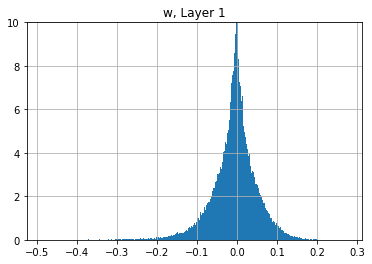

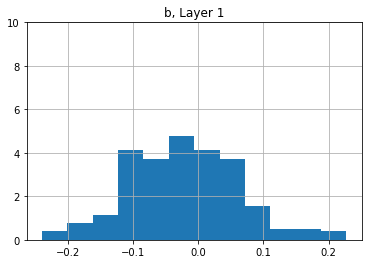

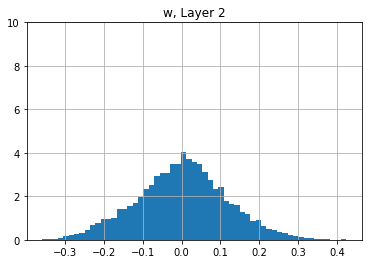

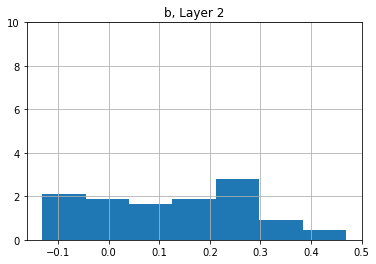

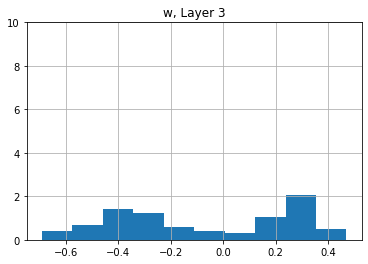

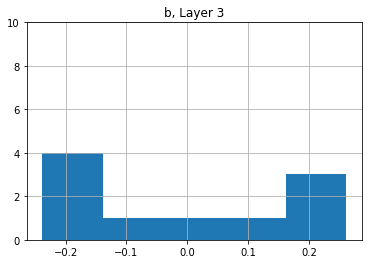

In [43]:
for i in range(len(modelo_final.get_weights())):
  _ = plt.hist(modelo_final.get_weights()[i].reshape((-1,)), bins='auto', density = True)
  plt.ylim((0,10))
  if i%2==0:
    plt.title('w, ' + 'Layer ' + str(i//2+1))
  else:
    plt.title('b, ' + 'Layer ' + str(i//2+1))
  plt.grid()
  plt.show()
